<a href="https://colab.research.google.com/github/Thomas-Guibert/AI-TP3/blob/main/AI_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Machine Learning avec Scikit Learn

## Exercice 1: Échauffement avec le dataset Hearthstone

### A - Les données

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


L'objectif de cette premiere partie est de prendre en main le traitement des données ainsi que la prise en main de colab. 

In [10]:
import pandas as pd  # charge le module pandas et le renomme pd
data = pd.read_csv("/content/drive/MyDrive/Université/M1/S8/IA/TP3/full_dataset.csv")

#Affichage des attribut
print(data.columns)
print("")
#Resumer des donnée
print(data)

print("")
help(len)

Index(['game_id', 'me_playing', 'my_board_nb_creatures',
       'my_board_total_attack', 'my_board_total_health', 'my_class', 'my_hand',
       'my_health', 'opponent_board_nb_creatures',
       'opponent_board_total_attack', 'opponent_board_total_health',
       'opponent_class', 'opponent_hand', 'opponent_health', 'result',
       'turn_id', 'turns_to_end'],
      dtype='object')

       game_id  me_playing  ...  turn_id  turns_to_end
0          434       False  ...        1            10
1          434        True  ...        2             9
2          434       False  ...        3             8
3          434        True  ...        4             7
4          434       False  ...        5             6
...        ...         ...  ...      ...           ...
36143      728       False  ...       17             4
36144      728        True  ...       18             3
36145      728       False  ...       19             2
36146      728        True  ...       20             1
36147    

In [21]:
print("taille des donnée, nombre de ligne")
print(len(data))
print("")
print("")
print("taille des donnée, nombre de ligne")
print("premier attribut des données")
print("    "+data.columns[0])
print("second attribut des données")
print("    "+data.columns[2])
print("derniere attribut des données")
print("    "+data.columns[-1]) 
print("")
print("")
print("Nombre de ligne et nombre de colone")
print(data.shape) 
print("")
print("")
print("Recuperation de la valeur de tout les attribut du premier element")
print(data.iloc[0])
print("")
print("")
print("Recuperation de la valeur de tout les attributs des 5 premier attribut")
print(data[0:5])
print("")
print("Recuperation de la valeur de tout les attributs des 5 derniere attribut")
print(data[-5:-1])
print("")
print("Recuperation de la valeur de tout les attributs qui sont des multiple de trois et inferieur a 10")
print(data[0:10:3])

print("")
print("")
print("Affiche l'attribut de la santé de toutes les lignes")
print(data["my_health"])
print("")
print("")
print("Affiche les attribut my_health et my_hand des ligne 0 a 5")
print(data[["my_health","my_hand"]][0:5])

taille des donnée, nombre de ligne
36148


taille des donnée, nombre de ligne
premier attribut des données
    game_id
second attribut des données
    my_board_nb_creatures
derniere attribut des données
    turns_to_end


Nombre de ligne et nombre de colone
(36148, 17)


Recuperation de la valeur de tout les attribut du premier element
game_id                            434
me_playing                       False
my_board_nb_creatures                0
my_board_total_attack                0
my_board_total_health                0
my_class                          Mage
my_hand                              5
my_health                           30
opponent_board_nb_creatures          2
opponent_board_total_attack          6
opponent_board_total_health          3
opponent_class                 Warlock
opponent_hand                        3
opponent_health                     27
result                               0
turn_id                              1
turns_to_end                        10

In [24]:
turns_before_end = 4   # 4 tours avant la fin

print("nombre de ligne ou eest egal a 4")
turn_df = data[data["turns_to_end"]==turns_before_end]
print(len(turn_df))

nombre de ligne ou eest egal a 4
2049


In [29]:
features_cols = ["my_health", "opponent_health", "my_hand", "opponent_hand", "my_board_nb_creatures",
     "my_board_total_health", "my_board_total_attack", "opponent_board_nb_creatures",
     "opponent_board_total_health", "opponent_board_total_attack", "me_playing"]
 
pred_col = "result"
 
X = turn_df[features_cols]
Y = turn_df[pred_col]
#Description des ligne ou il n'y a plus que 4 tour avant la fin
print(X)
#Affichage d'uniquement le resultat pour chacune
print(Y)

       my_health  opponent_health  ...  opponent_board_total_attack  me_playing
6             23               27  ...                         11.0       False
13            27               30  ...                          6.0        True
28             8               28  ...                         13.0       False
45            24                9  ...                          4.0        True
65            18               20  ...                         17.0       False
...          ...              ...  ...                          ...         ...
36086         22               23  ...                          0.0       False
36096         26               28  ...                          5.0        True
36108         23               15  ...                          3.0       False
36122         30               30  ...                          6.0        True
36143         14               23  ...                          6.0       False

[2049 rows x 11 columns]
6        0
13 

### B - Affichage

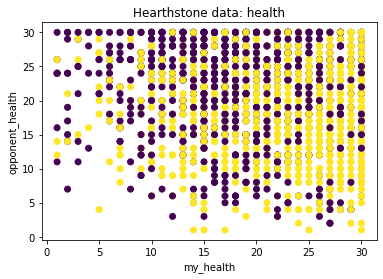

In [32]:
from matplotlib import pyplot as plt # alias the name "pyplot" by "plt" 
 
x_col="my_health"
y_col="opponent_health"
 
plt.xlabel(x_col) # all the functions defined in a given library should be prefixed by the name of the library
plt.ylabel(y_col)
plt.title("Hearthstone data: health")
 
plt.scatter(X[x_col], X[y_col],c=Y)
plt.show() 